### Create functions for pattern searching and transitional probabilities

In [114]:
# python experts will hate this line... but it works fine.
from music21 import *

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy as dc

# recursive function to search for end of a pattern in a 1-dim array
def patternsearch(seq, pat, indices=None):
    if indices is None:
        indices = np.arange(len(seq))
    
    # if pattern is empty return everything. This is just for some special cases
    if len(pat) == 0:
        return indices
    
    # look for the first element in the pattern
    found = (seq == pat[0]).nonzero()[0]
    # only consider elements with the specified indices
    inind = np.in1d(found, indices)
    # if there is only one element left in the pattern return the indices
    if len(pat) == 1:
        return found[inind]
    # if there are more elements in the pattern continue the search for the next items
    elif np.any(inind):
        return patternsearch(seq, pat[1:], indices=found[inind]+1)
    else:
        return []

# find conditional probability of each element of pattern given previous elements    
def conditProb(seq, pat, pNum=None):
    # make sequence into an array
    if not isinstance(seq, np.ndarray):
        seq = np.array(seq)
    # pNum refers to the number of previous elements used to predict the next note. 
    if pNum is None:
        pNum = len(pat)
    
    # get probability of each interval given the previous
    problist = []
    for pt in range(len(pat)):
        # for each interval get the instances of the preceding pattern
        strt = pt - pNum
        strt = 0 if strt < 0 else strt
        eop = patternsearch(seq, pat[strt:pt])
        
        # if there are no preceding instances then set to 0
        if len(eop) == 0:
            problist.append(0)
        else:
            # remove any pattern that has reached the end
            if pt != len(pat):
                eop = eop[eop != len(seq)-1]
            # remaining preceding patterns, find which are followed by the next element in the list
            seqDist = seq[eop + 1]
            problist.append(np.sum(seqDist == pat[pt])/len(seqDist))
    
    return problist

# get interval distributions given a preceding pattern
def nextDist(seq, pat):
    # make sequence into an array
    if not isinstance(seq, np.ndarray):
        seq = np.array(seq)
    # find the pattern with in the array    
    eop = patternsearch(seq, pat)
    eop = eop[eop != len(seq)-1]
    # collect all following intervals after the pattern
    seqDist = seq[eop + 1]
    return seqDist


# get a measure of predictability given interval distribution
def intrvPred(seqDist, intrvsOfInterest):
    # intrvsOfInterest is a consecutive integer range of semitones to search for
    if not isinstance(intrvsOfInterest, np.ndarray):
        intrvsOfInterest = np.array(intrvsOfInterest)
    # define binedges for histogram count
    binedges = intrvsOfInterest - 0.5
    binedges = np.append(binedges, binedges[-1] + 1)
    
    # get counts for each interval
    n, x = np.histogram(intrvDist, binedges, density=True)
    # test against uniformity
    # the probability of each category if we expected uniformity
    uni = sum(n)/len(n)
    # the chi^2 value for deviation from uniformity
    return sum(((n-uni)**2)/uni)

### Compile corpus of tonal composers
This can take awhile

In [7]:
# select composers of interest and add them to a database
composers = ['Bach', 'Beethoven', 'Mozart', 'Corelli', 'Chopin', 'Handel', 'Haydn', 'Palestrina']
# composers = ['Bach']
database = corpus.search(composers[0], 'Composer')
for cmp in composers[1:]:
    database = database.union(corpus.search(cmp, 'Composer'))
    
intrvlist = []
cnt = 0
# for each piece in the database
for thisPiece in database:
    print('{} of {} total pieces'.format(cnt, len(database)))
    # identify score
    thisScore = thisPiece.parse()
    # for each part in the score get the notes
    for thisPart in thisScore.parts:
        testNotes = thisPart.flat.getElementsByClass('Note')
        # find the semitone difference between neighboring notes
        for n1, n2 in zip(testNotes[:-1], testNotes[1:]):
            intrvlist.append(interval.Interval(n1,n2).semitones)

    cnt += 1

0 of 1713 total pieces
1 of 1713 total pieces
2 of 1713 total pieces
3 of 1713 total pieces
4 of 1713 total pieces
5 of 1713 total pieces
6 of 1713 total pieces
7 of 1713 total pieces
8 of 1713 total pieces
9 of 1713 total pieces
10 of 1713 total pieces
11 of 1713 total pieces
12 of 1713 total pieces
13 of 1713 total pieces
14 of 1713 total pieces
15 of 1713 total pieces
16 of 1713 total pieces
17 of 1713 total pieces
18 of 1713 total pieces
19 of 1713 total pieces
20 of 1713 total pieces
21 of 1713 total pieces
22 of 1713 total pieces
23 of 1713 total pieces
24 of 1713 total pieces
25 of 1713 total pieces
26 of 1713 total pieces
27 of 1713 total pieces
28 of 1713 total pieces
29 of 1713 total pieces
30 of 1713 total pieces
31 of 1713 total pieces
32 of 1713 total pieces
33 of 1713 total pieces
34 of 1713 total pieces
35 of 1713 total pieces
36 of 1713 total pieces
37 of 1713 total pieces
38 of 1713 total pieces
39 of 1713 total pieces
40 of 1713 total pieces
41 of 1713 total pieces
42

334 of 1713 total pieces
335 of 1713 total pieces
336 of 1713 total pieces
337 of 1713 total pieces
338 of 1713 total pieces
339 of 1713 total pieces
340 of 1713 total pieces
341 of 1713 total pieces
342 of 1713 total pieces
343 of 1713 total pieces
344 of 1713 total pieces
345 of 1713 total pieces
346 of 1713 total pieces
347 of 1713 total pieces
348 of 1713 total pieces
349 of 1713 total pieces
350 of 1713 total pieces
351 of 1713 total pieces
352 of 1713 total pieces
353 of 1713 total pieces
354 of 1713 total pieces
355 of 1713 total pieces
356 of 1713 total pieces
357 of 1713 total pieces
358 of 1713 total pieces
359 of 1713 total pieces
360 of 1713 total pieces
361 of 1713 total pieces
362 of 1713 total pieces
363 of 1713 total pieces
364 of 1713 total pieces
365 of 1713 total pieces
366 of 1713 total pieces
367 of 1713 total pieces
368 of 1713 total pieces
369 of 1713 total pieces
370 of 1713 total pieces
371 of 1713 total pieces
372 of 1713 total pieces
373 of 1713 total pieces


662 of 1713 total pieces
663 of 1713 total pieces
664 of 1713 total pieces
665 of 1713 total pieces
666 of 1713 total pieces
667 of 1713 total pieces
668 of 1713 total pieces
669 of 1713 total pieces
670 of 1713 total pieces
671 of 1713 total pieces
672 of 1713 total pieces
673 of 1713 total pieces
674 of 1713 total pieces
675 of 1713 total pieces
676 of 1713 total pieces
677 of 1713 total pieces
678 of 1713 total pieces
679 of 1713 total pieces
680 of 1713 total pieces
681 of 1713 total pieces
682 of 1713 total pieces
683 of 1713 total pieces
684 of 1713 total pieces
685 of 1713 total pieces
686 of 1713 total pieces
687 of 1713 total pieces
688 of 1713 total pieces
689 of 1713 total pieces
690 of 1713 total pieces
691 of 1713 total pieces
692 of 1713 total pieces
693 of 1713 total pieces
694 of 1713 total pieces
695 of 1713 total pieces
696 of 1713 total pieces
697 of 1713 total pieces
698 of 1713 total pieces
699 of 1713 total pieces
700 of 1713 total pieces
701 of 1713 total pieces


990 of 1713 total pieces
991 of 1713 total pieces
992 of 1713 total pieces
993 of 1713 total pieces
994 of 1713 total pieces
995 of 1713 total pieces
996 of 1713 total pieces
997 of 1713 total pieces
998 of 1713 total pieces
999 of 1713 total pieces
1000 of 1713 total pieces
1001 of 1713 total pieces
1002 of 1713 total pieces
1003 of 1713 total pieces
1004 of 1713 total pieces
1005 of 1713 total pieces
1006 of 1713 total pieces
1007 of 1713 total pieces
1008 of 1713 total pieces
1009 of 1713 total pieces
1010 of 1713 total pieces
1011 of 1713 total pieces
1012 of 1713 total pieces
1013 of 1713 total pieces
1014 of 1713 total pieces
1015 of 1713 total pieces
1016 of 1713 total pieces
1017 of 1713 total pieces
1018 of 1713 total pieces
1019 of 1713 total pieces
1020 of 1713 total pieces
1021 of 1713 total pieces
1022 of 1713 total pieces
1023 of 1713 total pieces
1024 of 1713 total pieces
1025 of 1713 total pieces
1026 of 1713 total pieces
1027 of 1713 total pieces
1028 of 1713 total pie

1306 of 1713 total pieces
1307 of 1713 total pieces
1308 of 1713 total pieces
1309 of 1713 total pieces
1310 of 1713 total pieces
1311 of 1713 total pieces
1312 of 1713 total pieces
1313 of 1713 total pieces
1314 of 1713 total pieces
1315 of 1713 total pieces
1316 of 1713 total pieces
1317 of 1713 total pieces
1318 of 1713 total pieces
1319 of 1713 total pieces
1320 of 1713 total pieces
1321 of 1713 total pieces
1322 of 1713 total pieces
1323 of 1713 total pieces
1324 of 1713 total pieces
1325 of 1713 total pieces
1326 of 1713 total pieces
1327 of 1713 total pieces
1328 of 1713 total pieces
1329 of 1713 total pieces
1330 of 1713 total pieces
1331 of 1713 total pieces
1332 of 1713 total pieces
1333 of 1713 total pieces
1334 of 1713 total pieces
1335 of 1713 total pieces
1336 of 1713 total pieces
1337 of 1713 total pieces
1338 of 1713 total pieces
1339 of 1713 total pieces
1340 of 1713 total pieces
1341 of 1713 total pieces
1342 of 1713 total pieces
1343 of 1713 total pieces
1344 of 1713

1622 of 1713 total pieces
1623 of 1713 total pieces
1624 of 1713 total pieces
1625 of 1713 total pieces
1626 of 1713 total pieces
1627 of 1713 total pieces
1628 of 1713 total pieces
1629 of 1713 total pieces
1630 of 1713 total pieces
1631 of 1713 total pieces
1632 of 1713 total pieces
1633 of 1713 total pieces
1634 of 1713 total pieces
1635 of 1713 total pieces
1636 of 1713 total pieces
1637 of 1713 total pieces
1638 of 1713 total pieces
1639 of 1713 total pieces
1640 of 1713 total pieces
1641 of 1713 total pieces
1642 of 1713 total pieces
1643 of 1713 total pieces
1644 of 1713 total pieces
1645 of 1713 total pieces
1646 of 1713 total pieces
1647 of 1713 total pieces
1648 of 1713 total pieces
1649 of 1713 total pieces
1650 of 1713 total pieces
1651 of 1713 total pieces
1652 of 1713 total pieces
1653 of 1713 total pieces
1654 of 1713 total pieces
1655 of 1713 total pieces
1656 of 1713 total pieces
1657 of 1713 total pieces
1658 of 1713 total pieces
1659 of 1713 total pieces
1660 of 1713

### Get counts of 2-Interal transition probabilities in corpus

This is just for fun

In [8]:
intrvarray = np.array(intrvlist)
possIntervals = np.arange(-5, 6)
counts2D = np.zeros([len(possIntervals), len(possIntervals)])
for intrv1 in possIntervals:
    for intrv2 in possIntervals:
        eop = patternsearch(intrvarray, [intrv1, intrv2])
        counts2D[intrv1-min(possIntervals), intrv2-min(possIntervals)] = len(eop)

### Plot interval counts in 2-dimensional image

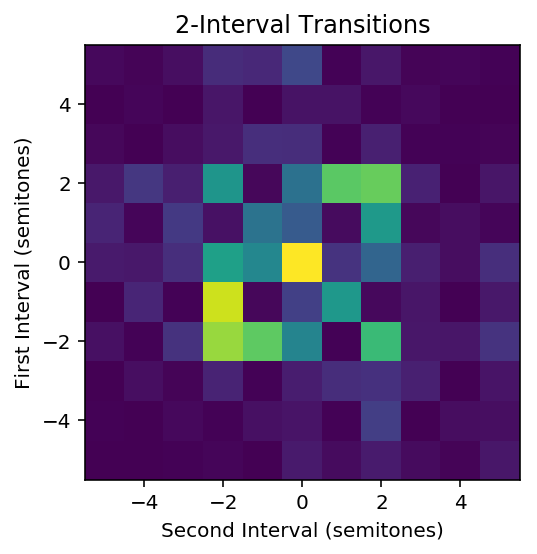

In [15]:
binedges = np.append(possIntervals, possIntervals[-1]+1) - 0.5
x,y = np.meshgrid(binedges, binedges)
plt.pcolormesh(x, y, counts2D)
plt.axis('equal'); plt.axis('square')
plt.title('2-Interval Transitions')
plt.xlabel('Second Interval (semitones)')
plt.ylabel('First Interval (semitones)')
plt.show()

## Read in a text file of melody notes and get predictability

This reads in melodies from a previous study to assess how common they are in the corpus we have

In [16]:
fname = 'all.txt'

lines = [line.rstrip('\n') for line in open(fname)]

for melody in lines:
    melodyList = melody.split(' ')
    intrvPtrn = []
    for n1, n2 in zip(melodyList[:-1], melodyList[1:]):
        # get semitone distance between patterns
        intrvPtrn.append(interval.Interval(note.Note(n1), note.Note(n2)).semitones)

    intervNum = 8
    eop = patternsearch(np.array(intrvlist), intrvPtrn[:intervNum])    
    print(len(eop)/(len(intrvlist) - intervNum))

0.0


As the melodies we were given were exceedingly rare in the corpus, it might be better to draw sequences from the corpus itself and select them on the basis of their predictability

### First plot a histogram of log probabilities of melodies of a certain length

This can take awhile

(array([ 4.,  2.,  9.,  6., 21., 12., 24., 32., 35., 54., 50., 69., 70.,
        71., 81., 81., 79., 78., 56., 43., 41., 34., 17., 11.,  6.,  3.,
         1.,  2.,  1.,  7.]),
 array([-12.32051678, -11.90983289, -11.49914899, -11.0884651 ,
        -10.67778121, -10.26709732,  -9.85641342,  -9.44572953,
         -9.03504564,  -8.62436175,  -8.21367785,  -7.80299396,
         -7.39231007,  -6.98162618,  -6.57094228,  -6.16025839,
         -5.7495745 ,  -5.3388906 ,  -4.92820671,  -4.51752282,
         -4.10683893,  -3.69615503,  -3.28547114,  -2.87478725,
         -2.46410336,  -2.05341946,  -1.64273557,  -1.23205168,
         -0.82136779,  -0.41068389,   0.        ]),
 <a list of 30 Patch objects>)

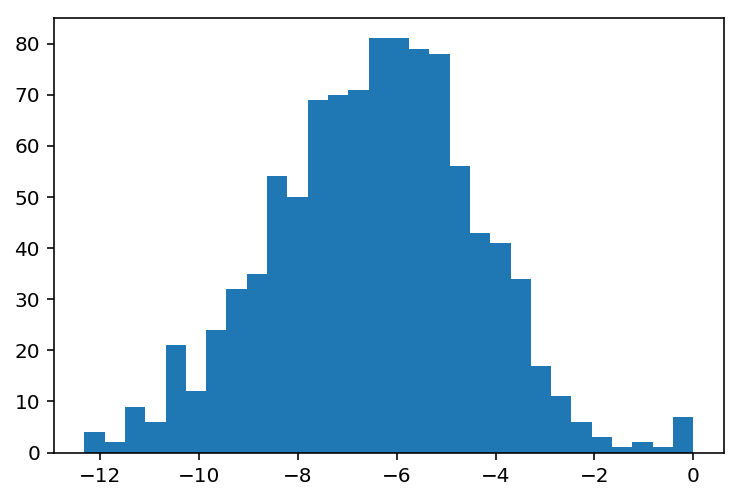

In [7]:
from scipy.stats import mode
from copy import deepcopy as dc
intrvBach = np.array(intrvlist)
# intrvBach = intrvBach[intrvBach.nonzero()]
# set the number of intervals for each list
intrvNum = 4
intrvPtrn = []

# a function to guide choice of next note

# random choice
func = np.random.choice

# # some percentile of predictability
# def choosepred(x, predPerc):
#     counts, semis = np.histogram(x, bins=np.arange(-12,14)-0.5)
#     semis = semis[:-1] + .5
#     semis, counts = semis[counts != 0], counts[counts != 0]
#     cntSel = np.percentile(counts, predPerc)
#     semSel = np.random.choice(semis[cntSel == counts])
#     return semSel
# func = lambda x: choosepred(x, 50)

# # the most common following note
# func = lambda x: mode(x)[0][0]

# get an interval pattern
intrvDist = dc(intrvBach)
predNum = intrvNum
iterations = 1000
prodProbs = []
for it in range(iterations):
    intsprobs = []
    for iN in range(intrvNum):
        # choose next interval
        nextIntrv = func(intrvDist)
        # save it and record the probability
        intrvPtrn.append(nextIntrv)
        intrvprob = np.sum(intrvDist == nextIntrv)/len(intrvDist)
        intsprobs.append(intrvprob)
        # Identify all the locations of the new updated pattern
        eop = patternsearch(intrvBach, intrvPtrn[-predNum:])
        # remove any pattern that has reached the end
        eop = eop[eop != len(intrvBach)-1]
        # generate new distribution for the following note
        intrvDist = intrvBach[eop+1]

    prodProbs.append(np.prod(intsprobs))

plt.hist(np.log(prodProbs), 30)

## Select melodies on the basis of their probability of occurrence over many iterations
This too can take awhile

In [224]:
iterations = 1500
intrvBach = np.array(intrvlist)
# remove repetitions of the same note
intrvBach = intrvBach[intrvBach.nonzero()]
intrvNum = 8
predNum = 4

# interval selection function
iselFunc = np.random.choice
# target melody selection function
tselFun = lambda x: np.percentile(x, np.arange(5,96,10))

logProbs = []
itPtrns = []
for it in range(iterations):
    intsprobs = []
    intrvPtrn = []

    # get an interval pattern
    intrvDist = dc(intrvBach)
    for iN in range(intrvNum):
        # choose next interval
        nextIntrv = iselFunc(intrvDist)
        # save it and record the probability
        intrvPtrn.append(nextIntrv)
        intrvprob = np.sum(intrvDist == nextIntrv)/len(intrvDist)
        intsprobs.append(intrvprob)
        # Identify all the locations of the new updated pattern
        eop = patternsearch(intrvBach, intrvPtrn[-predNum:])
        # remove any pattern that has reached the end
        eop = eop[eop != len(intrvBach)-1]
        # generate new distribution for the following note
        intrvDist = intrvBach[eop+1]
    
    # don't include phrases with very large jumps
    # (they are typically jumps between parts not actually written in melody)
    if not np.any(np.abs(np.array(intrvPtrn)) >= 12):
        # sum up transition probabilities (TP) for the interval string    
        itProb = np.sum(np.log(intsprobs))
        # save the interval pattern
        itPtrns.append(intrvPtrn)
        # save TP for each iteration
        logProbs.append(itProb)
        print('Iterating {} of {}'.format(it, iterations))

targetProbs = tselFun(logProbs)
selectIntervals = []
selProbs = []
for tP in targetProbs:
    indx = np.argmin((logProbs-tP)**2)
    selectIntervals.append(np.array(itPtrns[indx]))
    selProbs.append(logProbs[indx])

Iterating 0 of 1500
Iterating 2 of 1500
Iterating 3 of 1500
Iterating 5 of 1500
Iterating 7 of 1500
Iterating 8 of 1500
Iterating 9 of 1500
Iterating 11 of 1500
Iterating 12 of 1500
Iterating 14 of 1500
Iterating 15 of 1500
Iterating 16 of 1500
Iterating 17 of 1500
Iterating 18 of 1500
Iterating 19 of 1500
Iterating 20 of 1500
Iterating 21 of 1500
Iterating 22 of 1500
Iterating 23 of 1500
Iterating 24 of 1500
Iterating 25 of 1500
Iterating 26 of 1500
Iterating 28 of 1500
Iterating 29 of 1500
Iterating 30 of 1500
Iterating 31 of 1500
Iterating 32 of 1500
Iterating 34 of 1500
Iterating 35 of 1500
Iterating 36 of 1500
Iterating 37 of 1500
Iterating 38 of 1500
Iterating 39 of 1500
Iterating 40 of 1500
Iterating 41 of 1500
Iterating 42 of 1500
Iterating 43 of 1500
Iterating 44 of 1500
Iterating 45 of 1500
Iterating 46 of 1500
Iterating 47 of 1500
Iterating 48 of 1500
Iterating 49 of 1500
Iterating 50 of 1500
Iterating 53 of 1500
Iterating 54 of 1500
Iterating 55 of 1500
Iterating 56 of 1500

Iterating 427 of 1500
Iterating 430 of 1500
Iterating 431 of 1500
Iterating 432 of 1500
Iterating 433 of 1500
Iterating 434 of 1500
Iterating 435 of 1500
Iterating 436 of 1500
Iterating 437 of 1500
Iterating 438 of 1500
Iterating 439 of 1500
Iterating 440 of 1500
Iterating 441 of 1500
Iterating 442 of 1500
Iterating 443 of 1500
Iterating 444 of 1500
Iterating 445 of 1500
Iterating 446 of 1500
Iterating 447 of 1500
Iterating 448 of 1500
Iterating 449 of 1500
Iterating 450 of 1500
Iterating 451 of 1500
Iterating 452 of 1500
Iterating 453 of 1500
Iterating 454 of 1500
Iterating 457 of 1500
Iterating 458 of 1500
Iterating 459 of 1500
Iterating 460 of 1500
Iterating 461 of 1500
Iterating 462 of 1500
Iterating 463 of 1500
Iterating 464 of 1500
Iterating 465 of 1500
Iterating 466 of 1500
Iterating 467 of 1500
Iterating 468 of 1500
Iterating 469 of 1500
Iterating 470 of 1500
Iterating 471 of 1500
Iterating 472 of 1500
Iterating 473 of 1500
Iterating 474 of 1500
Iterating 475 of 1500
Iterating 

Iterating 838 of 1500
Iterating 839 of 1500
Iterating 840 of 1500
Iterating 841 of 1500
Iterating 842 of 1500
Iterating 843 of 1500
Iterating 844 of 1500
Iterating 845 of 1500
Iterating 846 of 1500
Iterating 847 of 1500
Iterating 848 of 1500
Iterating 849 of 1500
Iterating 850 of 1500
Iterating 852 of 1500
Iterating 853 of 1500
Iterating 854 of 1500
Iterating 856 of 1500
Iterating 857 of 1500
Iterating 858 of 1500
Iterating 859 of 1500
Iterating 861 of 1500
Iterating 862 of 1500
Iterating 863 of 1500
Iterating 864 of 1500
Iterating 866 of 1500
Iterating 868 of 1500
Iterating 869 of 1500
Iterating 870 of 1500
Iterating 871 of 1500
Iterating 872 of 1500
Iterating 873 of 1500
Iterating 874 of 1500
Iterating 876 of 1500
Iterating 877 of 1500
Iterating 879 of 1500
Iterating 880 of 1500
Iterating 881 of 1500
Iterating 882 of 1500
Iterating 883 of 1500
Iterating 884 of 1500
Iterating 886 of 1500
Iterating 887 of 1500
Iterating 888 of 1500
Iterating 889 of 1500
Iterating 890 of 1500
Iterating 

Iterating 1256 of 1500
Iterating 1257 of 1500
Iterating 1258 of 1500
Iterating 1259 of 1500
Iterating 1260 of 1500
Iterating 1261 of 1500
Iterating 1262 of 1500
Iterating 1263 of 1500
Iterating 1264 of 1500
Iterating 1265 of 1500
Iterating 1266 of 1500
Iterating 1267 of 1500
Iterating 1268 of 1500
Iterating 1269 of 1500
Iterating 1270 of 1500
Iterating 1271 of 1500
Iterating 1272 of 1500
Iterating 1273 of 1500
Iterating 1274 of 1500
Iterating 1275 of 1500
Iterating 1277 of 1500
Iterating 1279 of 1500
Iterating 1280 of 1500
Iterating 1281 of 1500
Iterating 1282 of 1500
Iterating 1283 of 1500
Iterating 1284 of 1500
Iterating 1285 of 1500
Iterating 1286 of 1500
Iterating 1287 of 1500
Iterating 1288 of 1500
Iterating 1289 of 1500
Iterating 1290 of 1500
Iterating 1291 of 1500
Iterating 1293 of 1500
Iterating 1294 of 1500
Iterating 1295 of 1500
Iterating 1296 of 1500
Iterating 1298 of 1500
Iterating 1299 of 1500
Iterating 1300 of 1500
Iterating 1301 of 1500
Iterating 1302 of 1500
Iterating 1

## Plot the melodies and their probability of occurence underneath

Melodies are plotted in order of increasing predictability.
Conditional probabilities are plotted under each note given all preceding notes

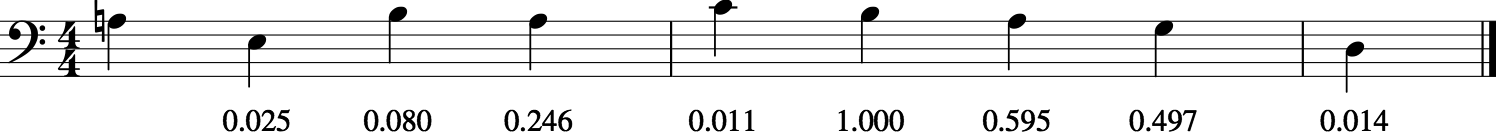

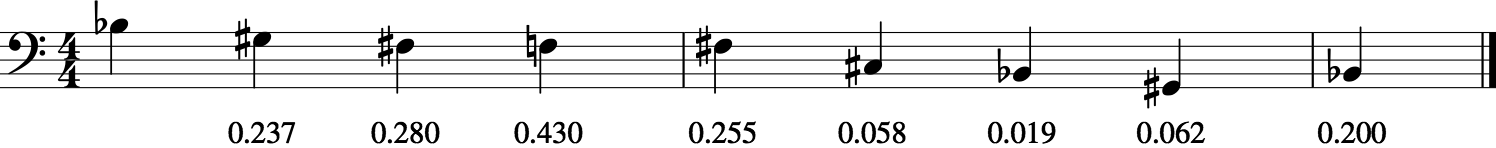

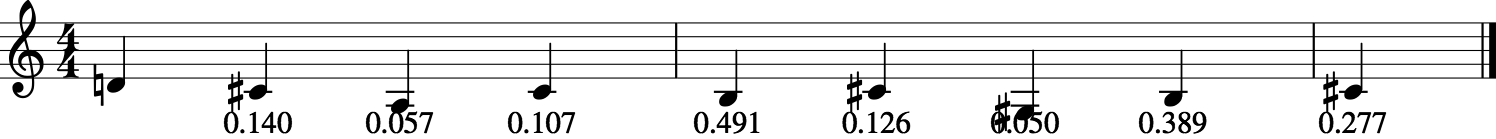

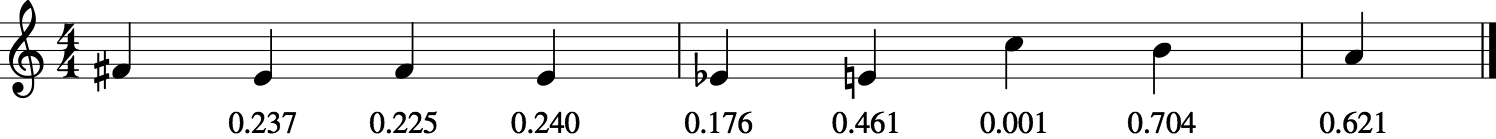

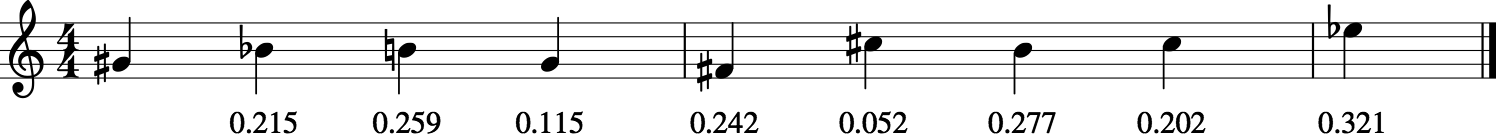

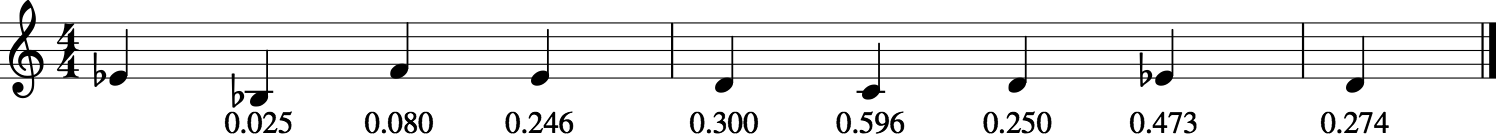

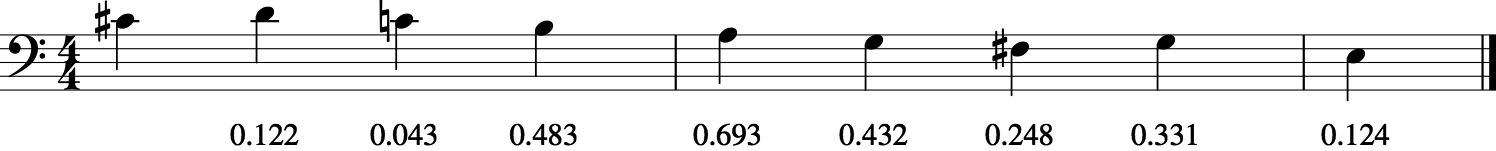

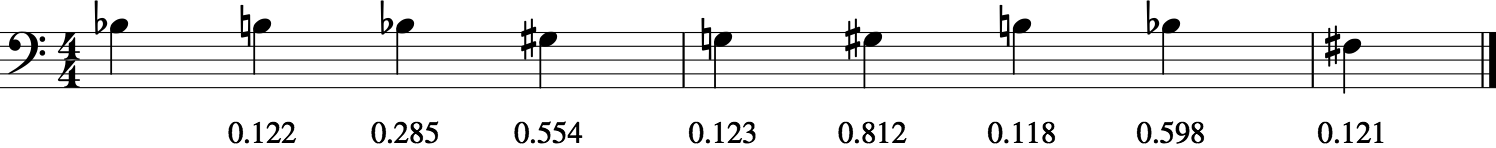

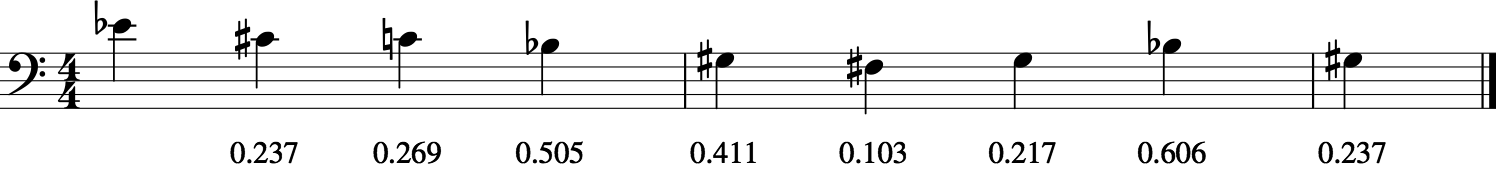

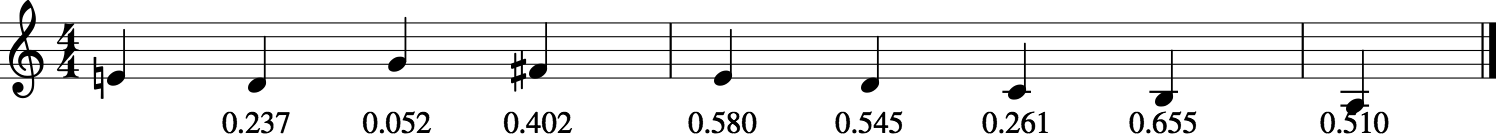

In [230]:
melStore = []
# Create Melodies based on the interval patterns starting with a random first note
for intrvSeq in selectIntervals:
    tProbsNote = conditProb(intrvBach, intrvSeq, predNum)
    # turn the interval list into melodies
    melody = stream.Stream()
    # start with a random note between A3 and A4
    nextNote = note.Note(np.random.randint(57,69)) 
    melody.append(nextNote)
    for nextIntrv, tPN in zip(intrvSeq, tProbsNote):
        nextNote = nextNote.transpose(nextIntrv)
        nextNote.lyric = '{:1.3f}'.format(tPN)
        melody.append(nextNote)
    melody.show()
    melStore.append(melody)

## Now include temporal jitter to adjust temporal predictability

Using `noiseParam` to adjust the amount of jitter added and `melInd` to select a melody

In [235]:
noiseParam = .5
melInd = 2

testM = dc(melStore[melInd])
for ind in np.arange(len(testM.notes)):
    thisNote = testM.notes[ind]
    if ind != 0:
        lastNote = testM.notes[ind-1]
        thisNote.offset = lastNote.offset + lastNote.quarterLength + float(np.round(np.random.randn(1)*noiseParam, 3))
# midi file misses the first note some times. Add a rest so we can hear everything
r = note.Rest()
testM.insertAndShift(0, r)
testM.show('midi')


## Prediction of timing of the next note given the previous notes
Assessing how predictable the timing based on some Bayesian-esque estimates

Text(0.5, 0, 'Expected Note Duration')

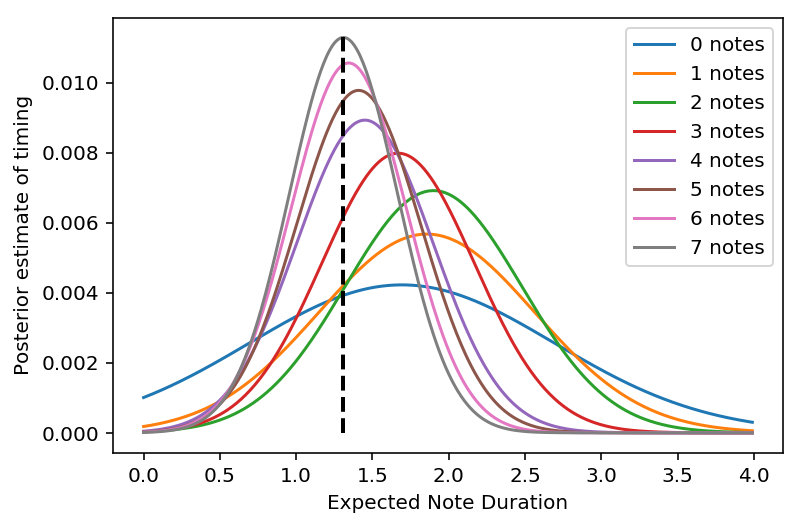

In [238]:
from scipy.stats import norm
durM = []
for ind in np.arange(1, len(testM.notes)):
    thisNote = testM.notes[ind]
    lastNote = testM.notes[ind - 1]
    durM.append(thisNote.offset - lastNote.offset)

x = np.arange(0, 4, 1./100)
sig = 1
posterior = np.ones_like(x)
fig, axs = plt.subplots(1)
# axs = axs.flatten()
for ind, dur in enumerate(durM):
#     ax = axs[ind]
    ax = axs
    prior = dc(posterior)
    newlike = norm.pdf(x, dur)
    posterior = newlike*prior
    posterior = posterior/np.sum(posterior)
    ax.plot(x, posterior, label='{} notes'.format(ind))
mProb = np.max(posterior)
mInd = np.argmax(posterior)
ax.legend()
ax.plot(x[[mInd, mInd]], [0, mProb], 'k--', lw=2)
ax.set_ylabel('Posterior estimate of timing')
ax.set_xlabel('Expected Note Duration')

## Setting up predictions of each note

Show the spread of note predictability across the 10 selected melodies

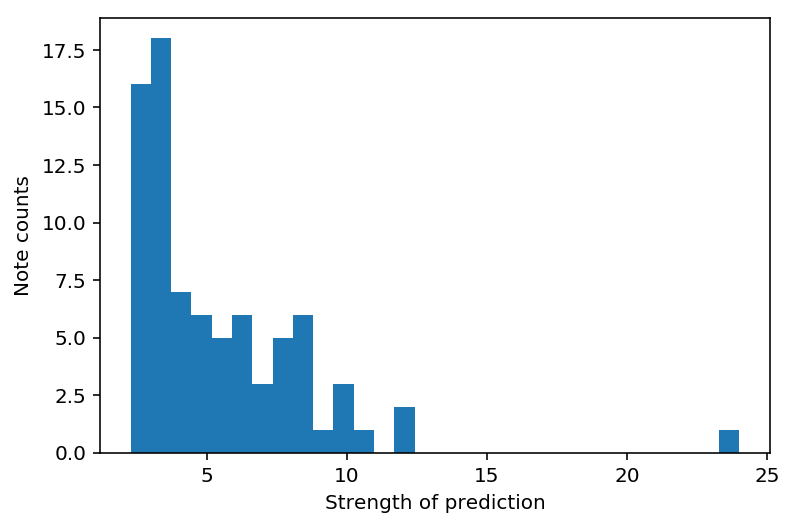

In [237]:
possIntervals = np.arange(-12, 13)
predictStore = []
for intSeq in selectIntervals:
    predictSeq = []
    for pos in np.arange(len(intSeq)):
        strt = pos - predNum
        strt = 0 if strt < 0 else strt
        intrvDist = nextDist(np.array(intrvlist), intSeq[strt:pos])
        predictSeq.append(intrvPred(intrvDist, possIntervals))
    predictStore.append(predictSeq)

plt.hist(np.array(predictStore).flatten(), 30)
plt.xlabel('Strength of prediction')
plt.ylabel('Note counts')
plt.show()        